In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/CMPUT 627

/content/drive/MyDrive/CMPUT 627


In [3]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 
import seaborn as sns
sns.set_theme(style="whitegrid")
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.decomposition import PCA
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.over_sampling import ADASYN 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('Datasets/NF-CSE-CIC-IDS2018.csv')
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign


In [ ]:
df['Attack'].value_counts()

Benign                      7373198
DDoS attacks-LOIC-HTTP       378199
FTP-BruteForce               193360
DoS attacks-Hulk             108136
DoS attacks-SlowHTTPTest     105550
SSH-Bruteforce                94237
Infilteration                 62072
DoS attacks-GoldenEye         32850
DoS attacks-Slowloris         22825
Bot                           15683
Brute Force -Web               2613
Brute Force -XSS               1745
DDOS attack-LOIC-UDP           1667
DDOS attack-HOIC                230
SQL Injection                    36
Name: Attack, dtype: int64

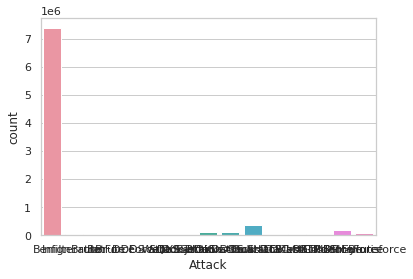

In [ ]:
sns.countplot(x=df["Attack"])

In [ ]:
df['Attack'].value_counts()

Benign                      7373198
DDoS attacks-LOIC-HTTP       378199
FTP-BruteForce               193360
DoS attacks-Hulk             108136
DoS attacks-SlowHTTPTest     105550
SSH-Bruteforce                94237
Infilteration                 62072
DoS attacks-GoldenEye         32850
DoS attacks-Slowloris         22825
Bot                           15683
Brute Force -Web               2613
Brute Force -XSS               1745
DDOS attack-LOIC-UDP           1667
DDOS attack-HOIC                230
SQL Injection                    36
Name: Attack, dtype: int64

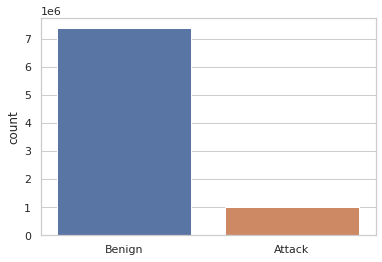

In [ ]:
# If even we merge all the attacks as one the the data distribution will look like
customLabels = []
attacks = list(df['Attack'].values)
for attack in attacks:
  if attack == "Benign":customLabels.append("Benign")
  else:customLabels.append("Attack")
sns.countplot(x=customLabels)


In [ ]:
df['customLabels'] = customLabels
df['customLabels'].value_counts()

Benign    7373198
Attack    1019203
Name: customLabels, dtype: int64

In [ ]:
df['Label'].value_counts()

0    7373198
1    1019203
Name: Label, dtype: int64

In [ ]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,customLabels
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign,Benign


## Data Distribution

In [ ]:
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      print("Invalid IP :",addr)
      return "-1"

df = pd.read_csv('Datasets/NF-CSE-CIC-IDS2018.csv')
train_columns = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
print(df.shape)
df = df[df['IPV4_DST_ADDR']!="-1"]
print(df.shape)

X = df[train_columns][:200000]
y = df['Label'][:200000]
# y = df['Attack']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Invalid IP : 188.
(8392401, 14)
(8392400, 14)


## Data Distribution (under-over)

In [5]:
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      print("Invalid IP :",addr)
      return "-1"

df = pd.read_csv('Datasets/NF-CSE-CIC-IDS2018.csv')
train_columns = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']
df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
df['IPV4_DST_ADDR'] = df['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
majority = ["Benign","DDoS attacks-LOIC-HTTP","FTP-BruteForce","DoS attacks-Hulk","DoS attacks-SlowHTTPTest","SSH-Bruteforce","Infilteration","DoS attacks-GoldenEye"]
df_filter = df[df['Attack'].isin(majority)]
# df_filter['Attack'].value_counts()
train_columns = ['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']
X = df_filter[train_columns]
y = df_filter['Attack']
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_res['Attack'] = y_res
df_under = df[~df['Attack'].isin(majority)]
frames = [df_under,X_res]
result = pd.concat(frames)

X = result[train_columns]
# y = df['Label']
y = result['Attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)



Invalid IP : 188.


In [ ]:
# result.to_csv('undersampled_datset_cse.csv')
print(Counter(y_train))

Counter({'DDoS attacks-LOIC-HTTP': 22010, 'Benign': 22010, 'FTP-BruteForce': 22010, 'DoS attacks-Hulk': 22009, 'SSH-Bruteforce': 22009, 'Infilteration': 22009, 'DoS attacks-SlowHTTPTest': 22009, 'DoS attacks-GoldenEye': 22009, 'DoS attacks-Slowloris': 15293, 'Bot': 10508, 'Brute Force -Web': 1751, 'Brute Force -XSS': 1169, 'DDOS attack-LOIC-UDP': 1117, 'DDOS attack-HOIC': 154, 'SQL Injection': 24})


## Random Oversampling

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
X_train_ros['Label'] = list(y_train_ros)
X_train_ros.head()
X_test['Label'] = list(y_test)
X_train_ros.to_csv('ros_train.csv')
X_test.to_csv('test.csv')

## ROS (multi class)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
X_train_ros['Attack'] = list(y_train_ros)
X_train_ros.head()
X_test['Attack'] = list(y_test)
X_train_ros.to_csv('multi_ros_train.csv')
X_test.to_csv('multi_test.csv')

In [ ]:
X_train_ros['Attack'].value_counts()

DoS attacks-Hulk            22010
SSH-Bruteforce              22010
DDoS attacks-LOIC-HTTP      22010
Infilteration               22010
Benign                      22010
Bot                         22010
DoS attacks-SlowHTTPTest    22010
DoS attacks-GoldenEye       22010
FTP-BruteForce              22010
DoS attacks-Slowloris       22010
DDOS attack-LOIC-UDP        22010
Brute Force -Web            22010
Brute Force -XSS            22010
DDOS attack-HOIC            22010
SQL Injection               22010
Name: Attack, dtype: int64

## SMOTE

In [ ]:
# Either drop or figure out a way to make custom IP address (source and destination)
# X_train = X_train.drop(['IPV4_SRC_ADDR','IPV4_DST_ADDR'], axis=1)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res['Label'] = list(y_res)
X_res.to_csv('smote_train.csv')

## SMOTE Multi Class

In [6]:
# Either drop or figure out a way to make custom IP address (source and destination)
# X_train = X_train.drop(['IPV4_SRC_ADDR','IPV4_DST_ADDR'], axis=1)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res['Attack'] = list(y_res)
X_res.to_csv('multi_smote_train.csv')

In [7]:
ls

 borderlinesmote_train.csv         multi_cse_smote.pkl
 cse_borderlinesmote.pkl           multi_ros_train.csv
 cse_custom_borderline.pkl         multi_smote_train.csv
 cse_ros.pkl                       multi_test.csv
 cse_smote.pkl                     Presentation/
'Data Exploration CSE.ipynb'       ros_train.csv
'Data Exploration UNSW.ipynb'      smote_train.csv
 Datasets/                         svm_train.csv
 multi_borderlinesmote.pkl         test.csv
 multi_borderlinesmote_train.csv   undersampled_datset_cse.csv
 multi_cse_ros.pkl                 unsw_oversampled/


## Borderline SMOTE

In [ ]:
oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_train_smote['Label'] = list(y_train_smote)
X_train_smote.to_csv('borderlinesmote_train.csv')

## Borderline SMOTE (multiclass)

In [ ]:
oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
X_train_smote['Attack'] = list(y_train_smote)
X_train_smote.to_csv('multi_borderlinesmote_train.csv')

## Custome Borderline SMOTE

In [ ]:
from collections import Counter
print(Counter(y_train))

Counter({0: 131156, 1: 2844})


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import plotly.express as px

# DO UNCOMMENT THIS PLEASE WHEN RUNNING FOR FIRST TIME
# X_train=(X_train-X_train.mean())/X_train.std()
# X_train =X_train.to_numpy().tolist()
y_train = list(y_train)
outlier_x = 21.88
outlier_y = 12.39
pca = PCA(n_components=2)
components = pca.fit_transform(X_train)
# fig = px.scatter(components, x=0, y=1, color_discrete_sequence=["red", "blue"],color=y_train)
# fig.show()

embeddings_pca = []
for index in range(len(components)):
    one = np.array(list(components[index]))
    two = np.array([outlier_x,outlier_y])
    dist = np.linalg.norm(one-two)
    embeddings_pca.append([X_train[index],dist,y_train[index],components[index]])

embeddings_pca.sort(key = lambda x:x[1])
print(embeddings_pca[0])
claims = []
premises = []

for index in range(40000):
    emb = embeddings_pca[index][0]
    label = embeddings_pca[index][2]
    if label == 1:claims.append(emb)
    else:premises.append(emb)
premises = premises*3
closest_X = claims+premises
closest_y = [1]*len(claims) + [0]*len(premises)
sm = SMOTE(random_state=42)
closest_X, closest_y = sm.fit_resample(closest_X, closest_y)
outlier_claims = []
for index in range(len(closest_X)):
    if closest_y[index] == 1:
        outlier_claims.append(closest_X[index])
X_train_ros = X_train + outlier_claims
print(Counter(y_train))
y_train_ros = y_train + [1]*len(outlier_claims)
print(Counter(y_train_ros))

pca = PCA(n_components=2)
components = pca.fit_transform(X_train_ros)

fig = px.scatter(components, x=0, y=1, color_discrete_sequence=["blue", "red"],color=y_train_ros)
fig.show()


# clf = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
# clf.fit(X_train_ros,y_train_ros)
# clf.score(X_test, y_test)
# y_pred = clf.predict(X_test)
# print('Accuracy : ',clf.score(X_test, y_test) )
# print('Macro F1 Score : ', f1_score(y_test, y_pred, average='macro'))
# print('F1 Score : ', f1_score(y_test, y_pred, average='weighted'))

# correct_claims = 0

# for index in range(len(y_pred)):
#     if y_pred[index]== "Claim" and y_test[index]== "Claim":
#         correct_claims+=1
# print('Number of Correct Claims : ', correct_claims)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X_train_ros, y_train_ros)



ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
print(len(X_train_ros[0]))

12


In [ ]:
df_test

,Unnamed: 0,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
0,94751,2887729681,50587,2887712770,53,17,0.000,205,364,3,3,0,0
1,144356,2887729156,59655,2887712770,53,17,0.000,58,122,1,1,0,4294966
2,182051,2887729926,60598,2887712770,53,17,0.000,63,104,1,1,0,4294965
3,45991,2887729683,49757,2887712770,53,17,0.000,213,351,3,3,0,0
4,179372,3245327941,57186,2887729926,3389,6,0.000,1970,724,14,8,219,4291174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65995,51318,2887730042,64932,2887712770,53,17,5.126,131,221,2,2,0,0
65996,92286,2887730444,51720,2887712770,53,17,0.000,113,204,2,2,0,0
65997,30136,3586844304,55284,2887729683,3389,6,0.000,1915,1991,14,10,219,4290858
65998,33123,2887729683,52018,1072786535,443,6,0.000,2074,4077,8,7,30,4290152


In [ ]:
import pickle
# with open('cse_custom_borderline.pkl', 'wb') as f:
#     pickle.dump(clf, f)

with open('cse_custom_borderline.pkl', 'rb') as f:
    clf = pickle.load(f)


# Testing Results
df_test = pd.read_csv('test.csv')

# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_test['IPV4_DST_ADDR']!="-1"]
y_col = ['Label','Unnamed: 0']
y_test = df_test['Label'][:30000]
X_test = df_test[df_test.columns.drop(y_col)][:30000]
y_pred = clf.predict(X_test)[:30000]    
X_test=(X_test-X_test.mean())/X_test.std()



precision = precision_score(list(y_test), list(y_pred))
recall = recall_score(list(y_test), list(y_pred))
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FN/(FN+TP))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='macro'))


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


Accuracy Score :  0.9781
Recall:  0.0
False Alarm Rate :  1.0
Precision:  0.0
F1 Score :  0.4944643850159244


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KMEANS SMOTE

In [ ]:
# Crashing because of memory issue :-(

sm = KMeansSMOTE(random_state=42,cluster_balance_threshold=0.1)
X_train_kmean, y_train_kmean = sm.fit_resample(X_train, y_train)
X_train_kmean['Label'] = list(y_train_kmean)
X_train_kmean.to_csv('kmean_train.csv')


## SVM SMOTE

In [ ]:
sm = SVMSMOTE(random_state=42)
X_train_svm, y_train_svm = sm.fit_resample(X_train, y_train)
X_train_svm['Label'] = list(y_train_svm)
X_train_svm.to_csv('svm_train.csv')


In [4]:
ls

 borderlinesmote_train.csv         multi_cse_smote.pkl
 cse_borderlinesmote.pkl           multi_ros_train.csv
 cse_custom_borderline.pkl         multi_smote_train.csv
 cse_ros.pkl                       multi_test.csv
 cse_smote.pkl                     Presentation/
'Data Exploration CSE.ipynb'       ros_train.csv
'Data Exploration UNSW.ipynb'      smote_train.csv
 Datasets/                         svm_train.csv
 multi_borderlinesmote.pkl         test.csv
 multi_borderlinesmote_train.csv   undersampled_datset_cse.csv
 multi_cse_ros.pkl                 unsw_oversampled/


## SVM SMOTE (multiclass)

In [ ]:
sm = SVMSMOTE(random_state=42)
X_train_svm, y_train_svm = sm.fit_resample(X_train, y_train)
X_train_svm['Attack'] = list(y_train_svm)
X_train_svm.to_csv('multi_svm_train.csv')


## Binary Classification : ROS

In [ ]:
df_binary = pd.read_csv('ros_train.csv')
df_binary.head()

,Unnamed: 0,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,0,3562827787,54111,2887729681,3389,6,0.000,2161,2240,9,13,222,4275459,0
1,1,90515499,55556,2887729156,3389,6,0.000,1460,1873,8,7,222,4293048,0
2,2,2887729683,50916,2838897104,443,6,0.000,2335,4303,15,15,27,4229902,0
3,3,2887729683,52181,585152124,443,6,91.178,1994,6442,18,17,27,4233981,0
4,4,2887729681,52506,2899904482,443,6,91.126,126,126,2,2,24,4294801,0


In [ ]:
df_binary = pd.read_csv('ros_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)



ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
# with open('cse_ros.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('cse_ros.pkl', 'rb') as f:
#     clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

Accuracy Score :  0.976030303030303
Recall:  0.2434017595307918
False Alarm Rate :  0.00850918992511913
Precision:  0.3764172335600907
F1 Score :  0.9735028300991221


## Binary Classification (multi)

In [ ]:
# target_names = ['class 0', 'class 1', 'class 2']
df_binary = pd.read_csv('multi_ros_train.csv')
df_binary['Attack'][:10]

0          DoS attacks-Hulk
1            SSH-Bruteforce
2    DDoS attacks-LOIC-HTTP
3             Infilteration
4             Infilteration
5    DDoS attacks-LOIC-HTTP
6            SSH-Bruteforce
7             Infilteration
8                    Benign
9            SSH-Bruteforce
Name: Attack, dtype: object

In [ ]:
df_binary = pd.read_csv('multi_ros_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_cse_ros.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_cse_ros.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)



CM = confusion_matrix(y_test, y_pred)



pre = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM)):
    summation+=CM[j][i]
  pre.append(CM[i][i]/summation)

recall = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM[0])):
    summation+=CM[i][j]
  recall.append(CM[i][i]/summation)



FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall : ', sum(recall)/len(recall))
print("False alarm rate : ", max(FP/(FP+TN)))
print('Precision : ',sum(pre)/len(pre))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))


print(classification_report(y_test, y_pred))


Accuracy Score :  0.9901682625999921
Recall :  0.908767999789397
False alarm rate :  0.005548289937779892
Precision :  0.8701229940676622
F1 Score :  0.9897569679621834
                          precision    recall  f1-score   support

                  Benign       1.00      0.97      0.98     10840
                     Bot       1.00      1.00      1.00      5175
        Brute Force -Web       0.97      0.31      0.47       862
        Brute Force -XSS       0.50      0.96      0.65       576
        DDOS attack-HOIC       0.44      0.47      0.46        76
    DDOS attack-LOIC-UDP       0.99      1.00      1.00       550
  DDoS attacks-LOIC-HTTP       1.00      1.00      1.00     10840
   DoS attacks-GoldenEye       1.00      1.00      1.00     10841
        DoS attacks-Hulk       1.00      1.00      1.00     10841
DoS attacks-SlowHTTPTest       1.00      1.00      1.00     10841
   DoS attacks-Slowloris       1.00      1.00      1.00      7532
          FTP-BruteForce       1.00   

## Binary Classification : SMOTE

In [ ]:
df_binary = pd.read_csv('smote_train.csv')
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)



ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
# with open('cse_smote.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('cse_smote.pkl', 'rb') as f:
#     clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

Accuracy Score :  0.9757272727272728
Recall:  0.23240469208211142
False Alarm Rate :  0.008586546197165666
Precision:  0.36353211009174313
F1 Score :  0.9731028535137877


## Borderline SMOTE (multi)

In [ ]:
df_binary = pd.read_csv('multi_smote_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_cse_smote.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_cse_smote.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)

 


CM = confusion_matrix(y_test, y_pred)



pre = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM)):
    summation+=CM[j][i]
  pre.append(CM[i][i]/summation)

recall = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM[0])):
    summation+=CM[i][j]
  recall.append(CM[i][i]/summation)



FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall : ', sum(recall)/len(recall))
print("False alarm rate : ", max(FP/(FP+TN)))
print('Precision : ',sum(pre)/len(pre))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))




Accuracy Score :  0.9902175198013949
Recall :  0.9194264212172023
False alarm rate :  0.005488843974160821
Precision :  0.8736792874956161
F1 Score :  0.989807694819272
                          precision    recall  f1-score   support

                  Benign       1.00      0.97      0.98     10840
                     Bot       1.00      1.00      1.00      5175
        Brute Force -Web       0.97      0.32      0.48       862
        Brute Force -XSS       0.50      0.95      0.65       576
        DDOS attack-HOIC       0.48      0.55      0.52        76
    DDOS attack-LOIC-UDP       0.99      1.00      1.00       550
  DDoS attacks-LOIC-HTTP       1.00      1.00      1.00     10840
   DoS attacks-GoldenEye       1.00      1.00      1.00     10841
        DoS attacks-Hulk       1.00      1.00      1.00     10841
DoS attacks-SlowHTTPTest       1.00      1.00      1.00     10841
   DoS attacks-Slowloris       1.00      1.00      1.00      7532
          FTP-BruteForce       1.00   

0.8736792874956161
0.9194264212172023
False alarm rate :  0.6844547563805105


## Borderline SMOTE

In [ ]:
df_binary = pd.read_csv('borderlinesmote_train.csv')
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)



ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
# with open('cse_borderlinesmote.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('cse_borderlinesmote.pkl', 'rb') as f:
#     clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))


Accuracy Score :  0.9763030303030303
Recall:  0.2368035190615836
False Alarm Rate :  0.008091466056067826
Precision:  0.3817966903073286
F1 Score :  0.9735731621692635


## Borderline SMOTE (multi)

In [ ]:
df_binary = pd.read_csv('multi_borderlinesmote_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_borderlinesmote.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_borderlinesmote.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


CM = confusion_matrix(y_test, y_pred)



pre = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM)):
    summation+=CM[j][i]
  pre.append(CM[i][i]/summation)

recall = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM[0])):
    summation+=CM[i][j]
  recall.append(CM[i][i]/summation)



FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall : ', sum(recall)/len(recall))
print("False alarm rate : ", max(FP/(FP+TN)))
print('Precision : ',sum(pre)/len(pre))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))

print(classification_report(y_test, y_pred))



Accuracy Score :  0.9899712337943808
Recall :  0.9072296288214409
False alarm rate :  0.004171125113938097
Precision :  0.8555207629666561
F1 Score :  0.9900456588057389
                          precision    recall  f1-score   support

                  Benign       1.00      0.97      0.98     10840
                     Bot       1.00      1.00      1.00      5175
        Brute Force -Web       0.72      0.47      0.57       862
        Brute Force -XSS       0.49      0.70      0.58       576
        DDOS attack-HOIC       0.48      0.55      0.51        76
    DDOS attack-LOIC-UDP       0.99      1.00      1.00       550
  DDoS attacks-LOIC-HTTP       1.00      1.00      1.00     10840
   DoS attacks-GoldenEye       1.00      1.00      1.00     10841
        DoS attacks-Hulk       1.00      1.00      1.00     10841
DoS attacks-SlowHTTPTest       1.00      1.00      1.00     10841
   DoS attacks-Slowloris       1.00      1.00      1.00      7532
          FTP-BruteForce       1.00  

## SVM SMOTE

In [ ]:
df_binary = pd.read_csv('svm_train.csv')
y_col = 'Label'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)



ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
import pickle
# with open('cse_smote.pkl', 'wb') as f:
#     pickle.dump(clf, f)

# with open('cse_smote.pkl', 'rb') as f:
#     clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Label'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
 


CM = confusion_matrix(y_test, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall: ',recall)
print('False Alarm Rate : ', FP/(FP+TN))
print('Precision: ',precision)
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))


Accuracy Score :  0.9808939393939394
Recall:  0.37316715542521994
False Alarm Rate :  0.0062813292901788475
Precision:  0.5562841530054645
F1 Score :  0.9790449029899372


In [8]:
df_binary = pd.read_csv('multi_svm_train.csv')
# convert ipv4 to int
import socket
import struct

def ip2int(addr):
    try:
      return struct.unpack("!I", socket.inet_aton(addr))[0]
    except:
      return "-1"

# df_binary['IPV4_SRC_ADDR'] = df_binary['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary['IPV4_DST_ADDR'] = df_binary['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_binary = df_binary[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y = df_binary[y_col]
X = df_binary[df_binary.columns.drop(y_col)]

# run Extra Trees ensemble classifier, made up of 50 randomised decision trees estimators

clf = ExtraTreesClassifier(n_estimators=50, random_state=0)
# conduct five cross-validation splits and collect the average metrics such as accuracy, Area Under the Curve (AUC), F1 Score, Detection Rate
# (DR), False Alarm Rate (FAR) and time required in microseconds (µs)
from sklearn.model_selection import cross_validate
from numpy import mean
# scores = cross_validate(clf, X, y, cv=5, scoring=('accuracy', 'roc_auc', 'f1'), return_train_score=True)
clf.fit(X, y)

import pickle
with open('multi_borderlinesmote.pkl', 'wb') as f:
    pickle.dump(clf, f)

with open('multi_borderlinesmote.pkl', 'rb') as f:
    clf = pickle.load(f)

# Testing Results
df_test = pd.read_csv('multi_test.csv')
# df_test['IPV4_SRC_ADDR'] = df_test['IPV4_SRC_ADDR'].apply(lambda x: ip2int(x)) 
# df_test['IPV4_DST_ADDR'] = df_test['IPV4_DST_ADDR'].apply(lambda x: ip2int(x)) 
# df_test = df_test[df_binary['IPV4_DST_ADDR']!="-1"]
y_col = 'Attack'
y_test = df_test[y_col]
X_test = df_test[df_test.columns.drop(y_col)]
y_pred = clf.predict(X_test)


CM = confusion_matrix(y_test, y_pred)



pre = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM)):
    summation+=CM[j][i]
  pre.append(CM[i][i]/summation)

recall = []
for i in range(len(CM)):
  summation = 0
  for j in range(len(CM[0])):
    summation+=CM[i][j]
  recall.append(CM[i][i]/summation)



FP = CM.sum(axis=0) - np.diag(CM)  
FN = CM.sum(axis=1) - np.diag(CM)
TP = np.diag(CM)
TN = CM.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print('Recall : ', sum(recall)/len(recall))
print("False alarm rate : ", max(FN/(FN+TP)))
print('Precision : ',sum(pre)/len(pre))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))




FileNotFoundError: ignored

In [9]:
ls

 borderlinesmote_train.csv         multi_cse_smote.pkl
 cse_borderlinesmote.pkl           multi_ros_train.csv
 cse_custom_borderline.pkl         multi_smote_train.csv
 cse_ros.pkl                       multi_test.csv
 cse_smote.pkl                     Presentation/
'Data Exploration CSE.ipynb'       ros_train.csv
'Data Exploration UNSW.ipynb'      smote_train.csv
 Datasets/                         svm_train.csv
 multi_borderlinesmote.pkl         test.csv
 multi_borderlinesmote_train.csv   undersampled_datset_cse.csv
 multi_cse_ros.pkl                 unsw_oversampled/
